In [34]:
import pandas as pd
import numpy as np
train = pd.read_csv("train.csv")
holdout = pd.read_csv("test.csv")
holdout.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [35]:
print(train.shape)
print(holdout.shape)

(891, 12)
(418, 11)


In [36]:
print(train["Fare"].mean())
print(holdout["Fare"].mean())

32.204207968574636
35.627188489208635


In [37]:
print(train.isnull().sum(), '\n')
print(holdout.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [38]:
# %load functions.py
def process_missing(df):
    """Handle various missing values from the data set
    Usage
    ------
    holdout = process_missing(holdout)
    """
    df["Fare"] = df["Fare"].fillna(df["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

def process_age(df):
    """Process the Age column into pre-defined 'bins' 
    Usage
    ------
    train = process_age(train)
    """
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df):
    """Process the Fare column into pre-defined 'bins' 
    Usage
    ------
    train = process_fare(train)
    """
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_cabin(df):
    """Process the Cabin column into pre-defined 'bins' 
    Usage
    ------
    train process_cabin(train)
    """
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df = df.drop('Cabin',axis=1)
    return df

def process_titles(df):
    """Extract and categorize the title from the name column 
    Usage
    ------
    train = process_titles(train)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column
    Usage
    ------
    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [39]:
def process_df(df):
    process_missing(df)
    print(df.head(1))
    process_age(df)
    process_fare(df)
    process_titles(df)
    process_cabin(df)
    create_dummies(df,"Age_categories")
    create_dummies(df,"Fare_categories")
    create_dummies(df,"Title")
    create_dummies(df,"Cabin_type")
    create_dummies(df,"Sex")
    return df
    
train = process_df(train)
holdout = process_df(holdout)

   PassengerId  Survived  Pclass                     Name   Sex   Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris  male  22.0      1   

   Parch     Ticket  Fare Cabin Embarked  
0      0  A/5 21171  7.25   NaN        S  
   PassengerId  Pclass              Name   Sex   Age  SibSp  Parch  Ticket  \
0          892       3  Kelly, Mr. James  male  34.5      0      0  330911   

     Fare Cabin Embarked  
0  7.8292   NaN        Q  


```
SibSp = (number of siblings on board) / (number of spouse on board) 
ParCh = (number of Parents on board) / (number of Children on board) ```

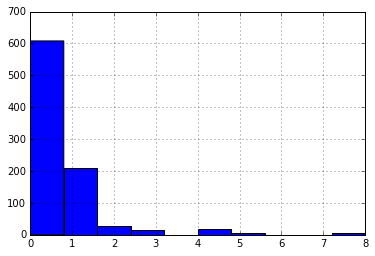

In [40]:
train['SibSp'].value_counts()
%matplotlib inline
train['SibSp'].hist()

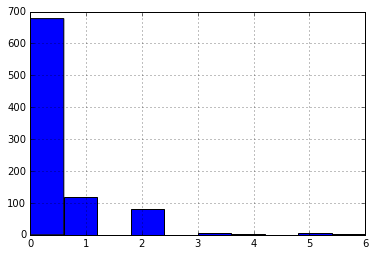

In [41]:
train['Parch'].value_counts()
train['Parch'].hist()

In [42]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.038062,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.011497,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.360547,0.083081,0.018443,-0.549500
Age,0.038062,0.011497,-0.360547,1.000000,-0.183470,-0.047017,0.135617
SibSp,-0.057527,-0.035322,0.083081,-0.183470,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.047017,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.135617,0.159651,0.216225,1.000000


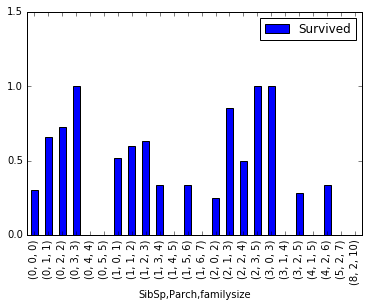

In [43]:
explore_cols = ["SibSp","Parch","Survived"]
explore = train[explore_cols].copy()

explore['familysize'] = explore[["SibSp","Parch"]].sum(axis=1)
pivot = explore.pivot_table(index=["SibSp","Parch","familysize"],values="Survived")
pivot.plot.bar(ylim=(0,1.5),yticks=np.arange(0,12,0.5))

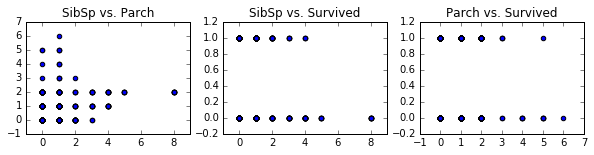

In [44]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_figheight(2)
fig.set_figwidth(10)
ax1.scatter(explore["SibSp"], explore["Parch"])
ax1.set_title("SibSp vs. Parch")
ax2.scatter(explore["SibSp"], explore["Survived"])
ax2.set_title("SibSp vs. Survived")
ax3.scatter(explore["Parch"], explore["Survived"])
ax3.set_title("Parch vs. Survived")

In [45]:
def isalone(df):
    df["f_size"] = df[["SibSp","Parch"]].sum(axis=1)
    df["isalone"] = df["f_size"].apply(lambda x: 0 if x > 0 else 1)
    return df

train = isalone(train)
holdout = isalone(holdout)
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Fare_categories,Title,Cabin_type,f_size,isalone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Young Adult,0-12,Mr,Unknown,1,0


In [59]:
# select best features
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
def select_features(df):
    df = df.select_dtypes([np.number]).dropna(axis=1)
    all_X = df.drop(["PassengerId", "Survived"], axis=1)
    all_y = df["Survived"]
    clf = RandomForestClassifier(random_state=1)
    selector = RFECV(clf, cv=10)
    selector.fit(all_X, all_y)
    best_columns = list(all_X.columns[selector.support_])
    return best_columns
best_cols = select_features(train)
print(best_cols)

['Pclass', 'Age', 'Parch', 'Fare', 'f_size']


/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/utils/__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


In [84]:
# model selection and tuning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
def select_model(df, features):
    all_X = df[features]
    all_y = df["Survived"]
    
    models = [
            {"name": "LogisticRegression",
             "estimator": LogisticRegression(),
             "hyperparameters": {
                 "solver": ["newton-cg", "lbfgs", "liblinear"]
                 }
            },
        
            {"name": "KNeighborsClassifier",
             "estimator": KNeighborsClassifier(),
             "hyperparameters":{
                "n_neighbors": range(1,20,2),
                "weights": ["distance", "uniform"],
                "algorithm": ["ball_tree", "kd_tree", "brute"],
                "p": [1,2]
                }
            },
            
            {"name": "RandomForestClassifier",
             "estimator": RandomForestClassifier(random_state=1),
             "hyperparameters":{
                    "n_estimators": [4, 6, 9],
                    "criterion": ["entropy", "gini"],
                    "max_depth": [2, 5, 10],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": [1, 5, 8],
                    "min_samples_split": [2, 3, 5]
                 }
            }
    ]

    for model in models:
        print(model["name"])
        grid = GridSearchCV(
                    estimator = model["estimator"],
                    param_grid = model["hyperparameters"],
                    cv=10)
        grid.fit(all_X, all_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_   
        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))
    
    return models    

result = select_model(train,best_cols)

LogisticRegression
Best Score: 0.7014590347923682
Best Parameters: {'solver': 'liblinear'}

KNeighborsClassifier
Best Score: 0.7003367003367004
Best Parameters: {'p': 1, 'weights': 'uniform', 'n_neighbors': 19, 'algorithm': 'ball_tree'}

RandomForestClassifier
Best Score: 0.7328843995510662
Best Parameters: {'n_estimators': 6, 'min_samples_leaf': 1, 'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2, 'max_features': 'log2'}



In [91]:
def save_submission_file(model,cols,filename="submission.csv"):
    holdout_data = holdout[cols]
    predictions = model.predict(holdout_data)
    
    holdout_ids = holdout["PassengerId"]
    submission_df = {"PassengerId": holdout_ids,
                 "Survived": predictions}
    submission = pd.DataFrame(submission_df)
    submission.to_csv(filename,index=False)

best_model = result[2]["best_model"]
save_submission_file(best_model,best_cols)